# Mall customer segmentation by K-Means

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [6]:
# Finding whether there are missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# EDA

Annual income and spending score have higher sd than age, meaning that they are dispersed and may help clustering.

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


if we look at the pairplot of annual income and spending score, it is obvious that the customers can be divided into 5. 

Combining age and spending, it can be divided into 2 groups: top-left and bottom-right, purchasing power of youngers is relatively higher.

In [8]:
feature = df.drop(columns='CustomerID')

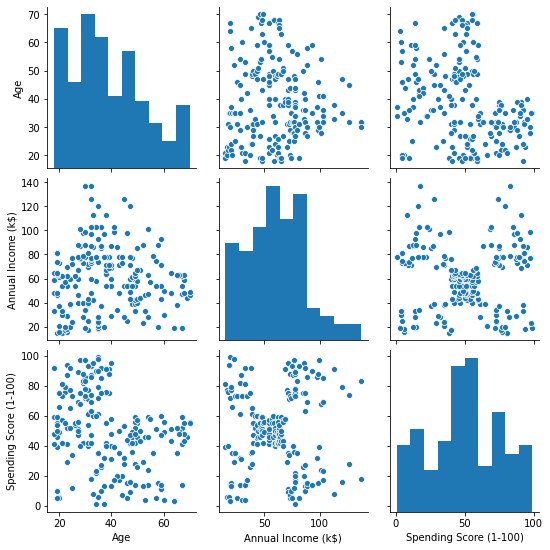

In [13]:
sns.pairplot(feature,kind="scatter")

([<matplotlib.patches.Wedge at 0x7f8874ba02d0>,
 [Text(-0.22485758633183295, 1.1787446991902115, 'Female'),
  Text(0.22485758633183303, -1.1787446991902115, 'Male')])

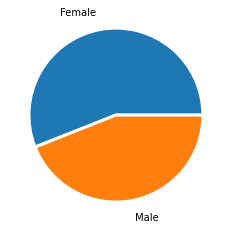

In [34]:
# Ratio of male and female
gender_count = df['Gender'].value_counts()
plt.pie(gender_count.values, labels=gender_count.index, labeldistance=1.2, 
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })

If we take a deep dive into the features, it is observed that spending score has 3 peaks(0-20,40-60,80-100), as for annual income, it tends to right-skewed.

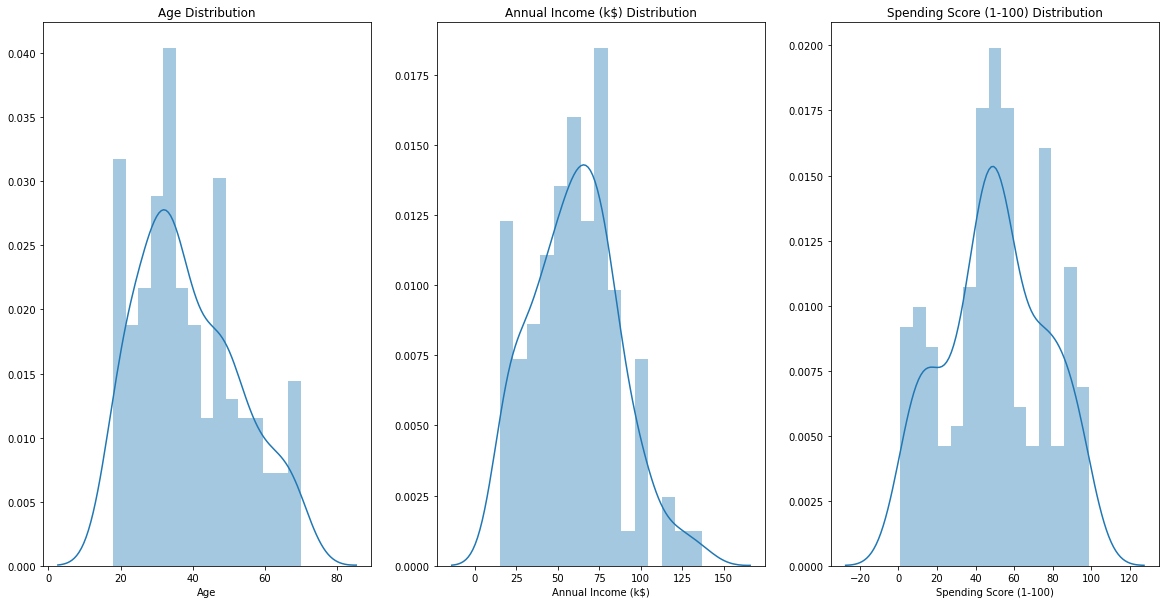

In [44]:
plt.figure(figsize = (20 , 10))
n=1
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.2)
    sns.distplot(df[x], bins = 15)
    plt.title('{} Distribution'.format(x))
    n+=1

# Clustering by k-means

In [45]:
from sklearn.cluster import KMeans

K-means clustering is a type of unsupervised learning, it is usually used when we don't know their groups/categories. The algorithm assign each data point to one of K groups based on the features similarity. 

It is useful to find groups which have not been explicitly labeled in the data. This can be used to confirm business assumptions about what types of groups exist or to identify unknown groups in complex data sets.

In [48]:
# Turn non-numeric feature into number
# Male=0, Female=1
feature.loc[feature['Gender']=='Male','Gender']=0
feature.loc[feature['Gender']=='Female','Gender']=1

# Elbow Method
- Objective: Find optimal value of k in KMeans

- Principal: 

    plots the value of cost function produced by different values of k. When k increases, the data-point can be further "voted" to the nearest cluster and the distances between the respective centroids will decrease. However, the improvements in sum of squared  error (SSE) will decline and start to level-off with the increase of k. Such distortion resembles "elbow".


- Terms:

    1. Distortion
average of the euclidean squared distance from the centroid of the respective clusters

    2. Inertia
Sum of squared distances of samples to their closest cluster center


Distortion mainly appear when k is between 3 and 5, so we should try k=3/4/5.

In [62]:
inertias = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(feature)
    inertias.append(km.inertia_)

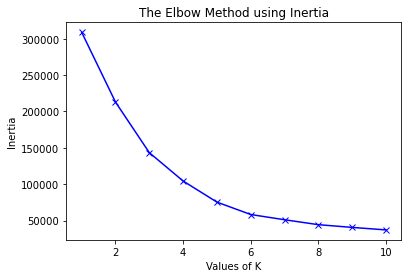

In [63]:
plt.plot(range(1, 11), inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [61]:
inertias

[308862.06000000006,
 212889.44245524294,
 143391.59236035674,
 104414.67534220174,
 75399.61541401486,
 58348.64136331505,
 51573.26479976481,
 44392.11566567934,
 40975.775288741745,
 37517.352482852904]

# Modelling 

Text(0.5, 1.0, 'Customer segmentation by 3 groups')

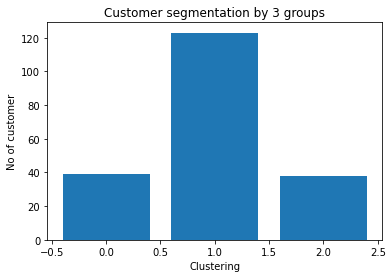

In [101]:
# 3 clusterings
# No of customers in each group respectively
km = KMeans(n_clusters=3).fit(feature)
y_km = km.fit_predict(feature)
n_cluster, km_count = np.unique(y_km, return_counts=True)
plt.bar(n_cluster, km_count)
plt.ylabel('No of customer')
plt.xlabel('Clustering')
plt.title('Customer segmentation by 3 groups')

Text(0.5, 1.0, 'Customer segmentation by 4 groups')

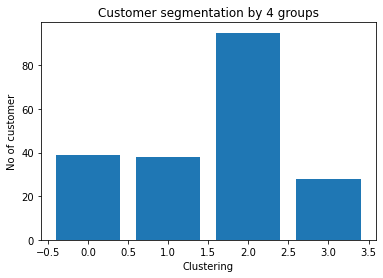

In [102]:
# 4 clusterings
# No of customers in each group respectively
km = KMeans(n_clusters=4).fit(feature)
y_km = km.fit_predict(feature)
n_cluster, km_count = np.unique(y_km, return_counts=True)
plt.bar(n_cluster, km_count)
plt.ylabel('No of customer')
plt.xlabel('Clustering')
plt.title('Customer segmentation by 4 groups')

Text(0.5, 1.0, 'Customer segmentation by 5 groups')

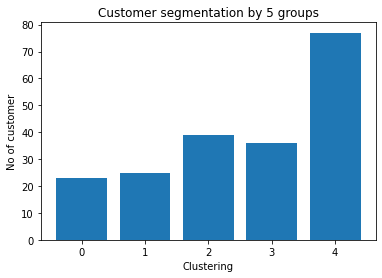

In [103]:
# 5 clusterings
# No of customers in each group respectively
km = KMeans(n_clusters=5).fit(feature)
y_km = km.fit_predict(feature)
n_cluster, km_count = np.unique(y_km, return_counts=True)
plt.bar(n_cluster, km_count)
plt.ylabel('No of customer')
plt.xlabel('Clustering')
plt.title('Customer segmentation by 5 groups')